In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Data Mining Data /Cleaned_DAWN_Data_2004-2011.csv")
y_2004 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2004.csv")
y_2005 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2005.csv")
y_2006 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2006.csv")
y_2007 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2007.csv")
y_2008 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2008.csv")
y_2009 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2009.csv")
y_2010 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2010.csv")
y_2011 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2011.csv")

dataframes = {
    'y_2004': y_2004,
    'y_2005': y_2005,
    'y_2006': y_2006,
    'y_2007': y_2007,
    'y_2008': y_2008,
    'y_2009': y_2009,
    'y_2010': y_2010,
    'y_2011': y_2011,
}

metro_mapping = {1:'MA',2:'NY',3:'IL',4:'MI',5:'MN',6:'FL',7:'TX',8:'LA',9:'CO',10:'AZ',11:'CA-SD',12:'CA-SF',13:'WA',14:'Other'}
agecat_mapping = {1:'<=5',2:'6-11',3:'12-17',4:'18-20',5:'21-24',6:'25-29',7:'30-34',8:'35-44',9:'45-54',10:'55-64',11:'>=65',-8:'PNS'}
sex_mapping = {1:'M',2:'F',-8:'PNS'}
race_mapping = {1:'white only',2:'black or african american only',3:'any hispanic or latino',4:'all other races',-8:'PNS'}
casetype_mapping = {1:'suicide attempt',2:'seeking detox',3:'alcohol only(age < 21)',4:'adverse reaction',5:'overmedication',6:'malicious poisoning',7:'accidental ingestion',8:'other'}
disposition_mapping = {1:'discharged home',2:'released to police/jail',3:'reffered to detox/treatment',4:'ICU/critical care',5:'surgery',6:'chemical dependency/detox, psychiatric unit',7:'other inpatient unit',8:'transferred',9:'left against medical advice',10:'died',96:'other',-8:'PNS'}

for df in dataframes.values():
    df['METRO'] = df['METRO'].replace(metro_mapping)
    df['AGECAT'] = df['AGECAT'].replace(agecat_mapping)
    df['SEX'] = df['SEX'].replace(sex_mapping)
    df['RACE'] = df['RACE'].replace(race_mapping)
    df['CASETYPE'] = df['CASETYPE'].replace(casetype_mapping)
    df['DISPOSITION'] = df['DISPOSITION'].replace(disposition_mapping)


def map_age_category(agecat):
    if agecat in ['<=5', '6-11', '12-17', '18-20', '21-24', '25-29']:
        return 'Young'
    elif agecat in ['30-34', '35-44','45-54']:
        return 'Middle Age'
    elif agecat in ['55-64', '>=65']:
        return 'Old'
    else:
        return 'Other'

for year, df in dataframes.items():
    df['AGECAT'] = df['AGECAT'].apply(map_age_category)

import pandas as pd

def classify_substance(row):
    if row['ALCOHOL'] == 1 and row['NUMSUBS'] == 1:
        return 'Alcohol'
    elif row['ALCOHOL'] == 1 and (row['NUMSUBS'] > 1):
        return 'Alcohol_DRUGS'
    elif row['ALCOHOL'] == 0 and (row['NUMSUBS']>0 ):
        return 'DRUGS'
    else:
        return 'None'

<ipython-input-2-d0659f955393>:2: DtypeWarning: Columns (12,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Data Mining Data /Cleaned_DAWN_Data_2004-2011.csv")
<ipython-input-2-d0659f955393>:8: DtypeWarning: Columns (8,13,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  y_2009 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2009.csv")


In [ ]:
y_2004['SUBSTANCE_TYPE'] = y_2004.apply(classify_substance, axis=1)
sequences_2004 = y_2004.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2004 = sequences_2004.apply(lambda x: ','.join(x))

y_2005['SUBSTANCE_TYPE'] = y_2005.apply(classify_substance, axis=1)
sequences_2005 = y_2005.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2005 = sequences_2005.apply(lambda x: ','.join(x))

y_2006['SUBSTANCE_TYPE'] = y_2006.apply(classify_substance, axis=1)
sequences_2006 = y_2006.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2006 = sequences_2006.apply(lambda x: ','.join(x))

y_2007['SUBSTANCE_TYPE'] = y_2007.apply(classify_substance, axis=1)
sequences_2007 = y_2007.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2007 = sequences_2007.apply(lambda x: ','.join(x))

y_2008['SUBSTANCE_TYPE'] = y_2008.apply(classify_substance, axis=1)
sequences_2008 = y_2008.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2008 = sequences_2008.apply(lambda x: ','.join(x))

y_2009['SUBSTANCE_TYPE'] = y_2009.apply(classify_substance, axis=1)
sequences_2009 = y_2009.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2009 = sequences_2009.apply(lambda x: ','.join(x))

y_2010['SUBSTANCE_TYPE'] = y_2010.apply(classify_substance, axis=1)
sequences_2010 = y_2010.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2010 = sequences_2010.apply(lambda x: ','.join(x))

y_2011['SUBSTANCE_TYPE'] = y_2011.apply(classify_substance, axis=1)
sequences_2011 = y_2011.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2011 = sequences_2011.apply(lambda x: ','.join(x))

In [ ]:
sequences_df = y_2004.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2004.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2004 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2005.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2005.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2005 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2006.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2006.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2006 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2007.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2007.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2007 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2008.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2008.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2008 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2009.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2009.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2009 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2010.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2010.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2010 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2011.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2011.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2011 = pd.merge(attributes_df, sequences_df, on='CASEID')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoders = {}
for column in ['METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART']:
    label_encoders[column] = LabelEncoder()
    df_2004[column] = label_encoders[column].fit_transform(df_2004[column])

df_2004['TARGET'] = df_2004['SEQUENCE'].map({'Alcohol': 0, 'Alcohol_DRUGS': 1, 'DRUGS': 2})

label_encoders['SEQUENCE'] = LabelEncoder()
df_2004['SEQUENCE'] = label_encoders['SEQUENCE'].fit_transform(df_2004['SEQUENCE'])

X = df_2004[['METRO', 'AGECAT', 'SEX', 'RACE', 'DAYPART', 'QUARTER', 'CASETYPE']]
y = df_2004['TARGET']

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
feature_names = X.columns.tolist()

feature_importances = list(zip(feature_names, importances))
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for name, importance in sorted_feature_importances:
    print(f"{name}: {importance}")

CASETYPE: 0.586726059589227
METRO: 0.15818181245600643
DAYPART: 0.05999022417634207
QUARTER: 0.056834844041848506
RACE: 0.056457844566083284
AGECAT: 0.053724248668262205
SEX: 0.028084966502230507


In [ ]:
label_encoders = {}
for column in ['METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART']:
    label_encoders[column] = LabelEncoder()
    df_2005[column] = label_encoders[column].fit_transform(df_2005[column])

df_2005['TARGET'] = df_2005['SEQUENCE'].map({'Alcohol': 0, 'Alcohol_DRUGS': 1, 'DRUGS': 2})

label_encoders['SEQUENCE'] = LabelEncoder()
df_2005['SEQUENCE'] = label_encoders['SEQUENCE'].fit_transform(df_2005['SEQUENCE'])

X = df_2005[['METRO', 'AGECAT', 'SEX', 'RACE', 'DAYPART', 'QUARTER', 'CASETYPE']]
y = df_2005['TARGET']

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
feature_names = X.columns.tolist()

feature_importances = list(zip(feature_names, importances))
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for name, importance in sorted_feature_importances:
    print(f"{name}: {importance}")

CASETYPE: 0.6357621270789768
METRO: 0.12668336038959857
AGECAT: 0.06041051815706712
DAYPART: 0.053647228372268915
RACE: 0.04733341393993927
QUARTER: 0.04711281308768274
SEX: 0.0290505389744666


In [ ]:
label_encoders = {}
for column in ['METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART']:
    label_encoders[column] = LabelEncoder()
    df_2006[column] = label_encoders[column].fit_transform(df_2006[column])

df_2006['TARGET'] = df_2006['SEQUENCE'].map({'Alcohol': 0, 'Alcohol_DRUGS': 1, 'DRUGS': 2})

label_encoders['SEQUENCE'] = LabelEncoder()
df_2006['SEQUENCE'] = label_encoders['SEQUENCE'].fit_transform(df_2006['SEQUENCE'])

X = df_2006[['METRO', 'AGECAT', 'SEX', 'RACE', 'DAYPART', 'QUARTER', 'CASETYPE']]
y = df_2006['TARGET']

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
feature_names = X.columns.tolist()

feature_importances = list(zip(feature_names, importances))
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for name, importance in sorted_feature_importances:
    print(f"{name}: {importance}")


CASETYPE: 0.6517218069240268
METRO: 0.12021732225050254
AGECAT: 0.05789249276286241
DAYPART: 0.05407697496909598
RACE: 0.04656349294593504
QUARTER: 0.0446028992402764
SEX: 0.02492501090730083


In [ ]:
label_encoders = {}
for column in ['METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART']:
    label_encoders[column] = LabelEncoder()
    df_2007[column] = label_encoders[column].fit_transform(df_2007[column])

df_2007['TARGET'] = df_2007['SEQUENCE'].map({'Alcohol': 0, 'Alcohol_DRUGS': 1, 'DRUGS': 2})

label_encoders['SEQUENCE'] = LabelEncoder()
df_2007['SEQUENCE'] = label_encoders['SEQUENCE'].fit_transform(df_2007['SEQUENCE'])

X = df_2007[['METRO', 'AGECAT', 'SEX', 'RACE', 'DAYPART', 'QUARTER', 'CASETYPE']]
y = df_2007['TARGET']

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
feature_names = X.columns.tolist()

feature_importances = list(zip(feature_names, importances))
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for name, importance in sorted_feature_importances:
    print(f"{name}: {importance}")

CASETYPE: 0.6614451368950456
METRO: 0.11234893827117959
AGECAT: 0.06048729073973346
DAYPART: 0.05276721602041831
RACE: 0.04471192821052159
QUARTER: 0.04169295143148689
SEX: 0.026546538431614537


In [ ]:
label_encoders = {}
for column in ['METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART']:
    label_encoders[column] = LabelEncoder()
    df_2008[column] = label_encoders[column].fit_transform(df_2008[column])

df_2008['TARGET'] = df_2008['SEQUENCE'].map({'Alcohol': 0, 'Alcohol_DRUGS': 1, 'DRUGS': 2})

label_encoders['SEQUENCE'] = LabelEncoder()
df_2008['SEQUENCE'] = label_encoders['SEQUENCE'].fit_transform(df_2008['SEQUENCE'])

X = df_2008[['METRO', 'AGECAT', 'SEX', 'RACE', 'DAYPART', 'QUARTER', 'CASETYPE']]
y = df_2008['TARGET']

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
feature_names = X.columns.tolist()

feature_importances = list(zip(feature_names, importances))
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for name, importance in sorted_feature_importances:
    print(f"{name}: {importance}")

CASETYPE: 0.6675233879483636
METRO: 0.11416178536179822
AGECAT: 0.05973515009264246
DAYPART: 0.048442251344666024
RACE: 0.04286578676533291
QUARTER: 0.04110697555980499
SEX: 0.026164662927391787


In [ ]:
label_encoders = {}
for column in ['METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART']:
    label_encoders[column] = LabelEncoder()
    df_2010[column] = label_encoders[column].fit_transform(df_2010[column])

df_2010['TARGET'] = df_2010['SEQUENCE'].map({'Alcohol': 0, 'Alcohol_DRUGS': 1, 'DRUGS': 2})

label_encoders['SEQUENCE'] = LabelEncoder()
df_2010['SEQUENCE'] = label_encoders['SEQUENCE'].fit_transform(df_2010['SEQUENCE'])

X = df_2010[['METRO', 'AGECAT', 'SEX', 'RACE', 'DAYPART', 'QUARTER', 'CASETYPE']]
y = df_2010['TARGET']

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
feature_names = X.columns.tolist()

feature_importances = list(zip(feature_names, importances))
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for name, importance in sorted_feature_importances:
    print(f"{name}: {importance}")

CASETYPE: 0.6500366675079945
METRO: 0.1235493171585457
DAYPART: 0.05486216547117194
AGECAT: 0.053088277616497336
RACE: 0.04566074185640965
QUARTER: 0.04333289978490258
SEX: 0.029469930604478348


In [ ]:
label_encoders = {}
for column in ['METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART']:
    label_encoders[column] = LabelEncoder()
    df_2011[column] = label_encoders[column].fit_transform(df_2011[column])

df_2011['TARGET'] = df_2011['SEQUENCE'].map({'Alcohol': 0, 'Alcohol_DRUGS': 1, 'DRUGS': 2})

label_encoders['SEQUENCE'] = LabelEncoder()
df_2011['SEQUENCE'] = label_encoders['SEQUENCE'].fit_transform(df_2011['SEQUENCE'])

X = df_2011[['METRO', 'AGECAT', 'SEX', 'RACE', 'DAYPART', 'QUARTER', 'CASETYPE']]
y = df_2011['TARGET']

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
feature_names = X.columns.tolist()

feature_importances = list(zip(feature_names, importances))
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for name, importance in sorted_feature_importances:
    print(f"{name}: {importance}")

CASETYPE: 0.6184314321164333
METRO: 0.14657498559104018
DAYPART: 0.054664111236125384
RACE: 0.051700807769001544
QUARTER: 0.050059814140762465
AGECAT: 0.04986441887649682
SEX: 0.02870443027014056


CASETYPE: 0.6184314321164333
METRO: 0.14657498559104018
DAYPART: 0.054664111236125384
RACE: 0.051700807769001544
QUARTER: 0.050059814140762465
AGECAT: 0.04986441887649682
SEX: 0.02870443027014056


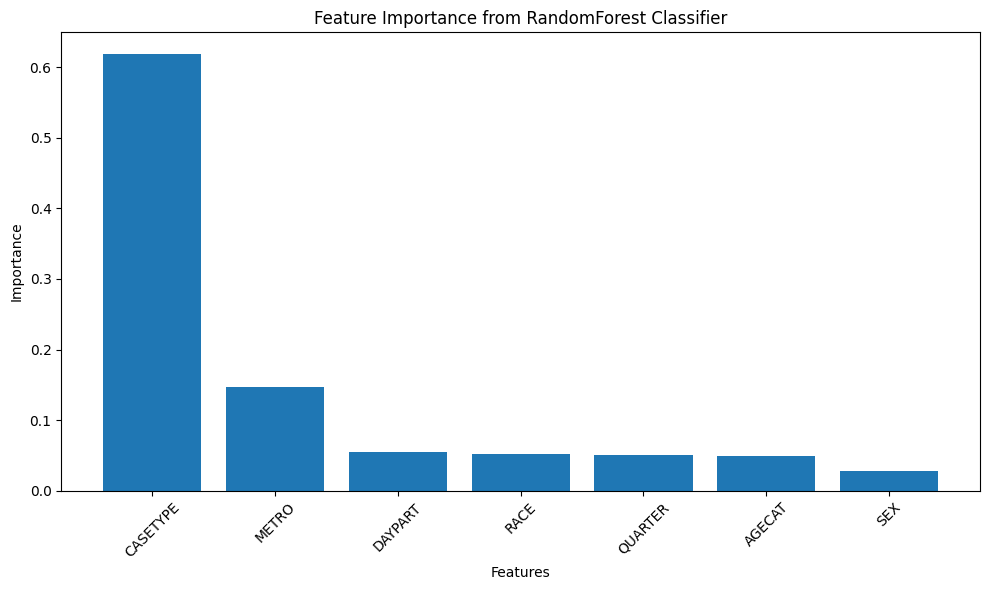

In [ ]:
sorted_feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)


import matplotlib.pyplot as plt


for name, importance in sorted_feature_importances:

    print(f"{name}: {importance}")



# Plotting the feature importances

plt.figure(figsize=(10, 6))

plt.bar(range(len(feature_names)), [imp for _, imp in sorted_feature_importances], align='center')

plt.xticks(range(len(feature_names)), [name for name, _ in sorted_feature_importances], rotation=45)

plt.xlabel('Features')

plt.ylabel('Importance')

plt.title('Feature Importance from RandomForest Classifier')

plt.tight_layout()

plt.show()